# Computer vision assignment


### Student name: Stephen Pangga
### Student number: 629860

#### Imports

In [4]:
# %pip install keras
# %pip install tensorflow
# %pip install image_dataset_loader

import keras
import os
from keras.models import *
from keras.layers import *
from keras.datasets import cifar10
from keras.optimizers import *
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot as plt
from keras.utils import *
from keras.applications.vgg16 import VGG16
from keras.applications.vgg19 import VGG19

from image_dataset_loader import load


# train_data_dir = os.path.dirname("output_path_no_Plain_220x380v3/train/")
# validation_data_dir = os.path.dirname("output_path_no_Plain_220x380v3/val/")
# test_data_dir = os.path.dirname("output_path_no_Plain_220x380v3/test/")


train_data_dir = os.path.dirname("output_path/train/")
validation_data_dir = os.path.dirname("output_path/val/")
test_data_dir = os.path.dirname("output_path/test/")

In [5]:

img_width, img_height = 224, 224
batch_size = 16

datagenerate_train = ImageDataGenerator(rescale=1.0/255, samplewise_center=True)
                                
train_generator = datagenerate_train.flow_from_directory(train_data_dir,
                                                target_size=(img_width,img_height),
                                                 batch_size=batch_size,
                                                 #subset="training",
                                                 class_mode='categorical',
                                                 shuffle = True)

datagenerate_validation = ImageDataGenerator(rescale=1.0/255, samplewise_center=True)

validation_generator = datagenerate_validation.flow_from_directory(validation_data_dir,
                                                        target_size=(img_width,img_height),
                                                        batch_size=batch_size,
                                                        #subset="validation",
                                                        class_mode='categorical',
                                                        shuffle = True)


print(train_generator)
print(validation_generator)
# print(test_generator)

Found 816 images belonging to 7 classes.
Found 101 images belonging to 7 classes.


# The Model

In [6]:
def define_VGGmodel():

    model = VGG16(include_top=False, input_shape=(img_width, img_height, 3))

    for layer in model.layers:
        layer.trainable = False

    flat1 = Flatten()(model.layers[-1].output)

    class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)

    output = Dense(7, activation='softmax')(class1)

    model = Model(inputs=model.inputs, outputs=output)

    # opt = SGD(lr=0.001, momentum=0.9)

    model.compile(optimizer="Adam", loss='categorical_crossentropy', metrics=['categorical_accuracy'])
    
    return model

model = define_VGGmodel()
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [7]:
from keras import callbacks
earlystopping = callbacks.EarlyStopping(monitor ="val_loss", 
                                        mode ="min", patience = 5, 
                                        restore_best_weights = True)

In [8]:
history = model.fit(train_generator, steps_per_epoch=len(train_generator), validation_data=validation_generator,
 validation_steps=len(validation_generator), epochs=25 , verbose=1, shuffle=False, callbacks=[earlystopping])

Epoch 1/25
51/51 [==============================] - 83s 2s/step - loss: 2.0130 - categorical_accuracy: 0.3811 - val_loss: 1.2446 - val_categorical_accuracy: 0.5545
Epoch 2/25
51/51 [==============================] - 82s 2s/step - loss: 0.8218 - categorical_accuracy: 0.7414 - val_loss: 0.8679 - val_categorical_accuracy: 0.6238
Epoch 3/25
51/51 [==============================] - 75s 1s/step - loss: 0.4796 - categorical_accuracy: 0.8934 - val_loss: 0.5692 - val_categorical_accuracy: 0.8317
Epoch 4/25
51/51 [==============================] - 82s 2s/step - loss: 0.2860 - categorical_accuracy: 0.9559 - val_loss: 0.5903 - val_categorical_accuracy: 0.7822
Epoch 5/25
51/51 [==============================] - 81s 2s/step - loss: 0.2206 - categorical_accuracy: 0.9706 - val_loss: 0.4360 - val_categorical_accuracy: 0.8911
Epoch 6/25
51/51 [==============================] - 80s 2s/step - loss: 0.1335 - categorical_accuracy: 0.9877 - val_loss: 0.3606 - val_categorical_accuracy: 0.9010
Epoch 7/25
51/51

In [9]:
print(history.history)

{'loss': [2.012996196746826, 0.8217641711235046, 0.47962120175361633, 0.28601253032684326, 0.2206156849861145, 0.13351689279079437, 0.08996354043483734, 0.0849025547504425, 0.07527531683444977, 0.04009522125124931, 0.03093503974378109, 0.026738448068499565, 0.02081669308245182, 0.017879987135529518, 0.015433376654982567, 0.013170113787055016, 0.012445982545614243, 0.011478454805910587, 0.009217247366905212, 0.0083229411393404, 0.007217416074126959, 0.006735136266797781, 0.006052668206393719, 0.005545631516724825, 0.005145586561411619], 'categorical_accuracy': [0.3811274468898773, 0.7414215803146362, 0.8933823704719543, 0.9558823704719543, 0.970588207244873, 0.9877451062202454, 0.9975489974021912, 0.9950980544090271, 0.9963235259056091, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 'val_loss': [1.2445828914642334, 0.8678803443908691, 0.5691992044448853, 0.590302586555481, 0.4359528124332428, 0.3605560064315796, 0.43199849128723145, 0.36018794775009155,

# Diagnostic plot

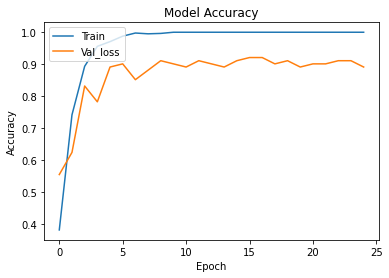

In [10]:
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val_loss'], loc='upper left')
plt.show()

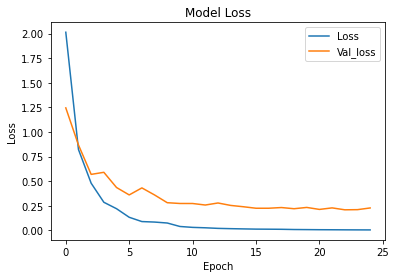

In [11]:

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Loss', 'Val_loss'], loc='upper right')
plt.show()

In [12]:
print('Validation image - evaluation')
_, acc = model.evaluate(validation_generator, steps=len(validation_generator), verbose=1)
print('accuracy score: ', acc*100 )

Validation image - evaluation
7/7 [==============================] - 9s 1s/step - loss: 0.2282 - categorical_accuracy: 0.8911
accuracy score:  89.10890817642212


In [13]:
model.save('VGG16-accu-score-92%')

#model=load_model('vgg15-softmax-classifier_train-91.54_val-72.06_test-83.82%')

INFO:tensorflow:Assets written to: VGG16-accu-score-92%\assets


INFO:tensorflow:Assets written to: VGG16-accu-score-92%\assets


# Testing

In [15]:
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn import metrics
# test_data_dir = os.path.dirname("output_path_no_Plain_220x380v1/train-test/")

datagenerate_test = ImageDataGenerator(rescale=1.0/255, samplewise_center=True)

test_generator = datagenerate_test.flow_from_directory(test_data_dir,
                                                target_size=(img_width,img_height),
                                                batch_size=batch_size,
                                                #subset="validation",
                                                class_mode='categorical',
                                                shuffle = False)

Found 103 images belonging to 7 classes.


In [ ]:
#model=load_model('VGG16-accu-score-92%')

In [17]:
print('Test image - evaluation')
_, acc = model.evaluate(test_generator, steps=len(test_generator), verbose=1)
print('accuracy score: ', acc*100 )

Test image - evaluation
7/7 [==============================] - 10s 1s/step - loss: 0.1904 - categorical_accuracy: 0.9126
accuracy score:  91.26213788986206


In [18]:

Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)
print('accuracy: ', metrics.accuracy_score(y_pred,test_generator.classes))

7/7 [==============================] - 9s 1s/step
accuracy:  0.912621359223301


In [19]:
print('Confusion Matrix')
print(confusion_matrix(y_pred, test_generator.classes))

Confusion Matrix
[[13  0  0  1  0  0  0]
 [ 0 17  0  0  1  0  0]
 [ 0  0 12  0  0  0  0]
 [ 0  0  0  8  0  0  0]
 [ 1  0  0  0 16  0  0]
 [ 0  1  0  0  1 17  3]
 [ 0  0  0  0  0  1 11]]


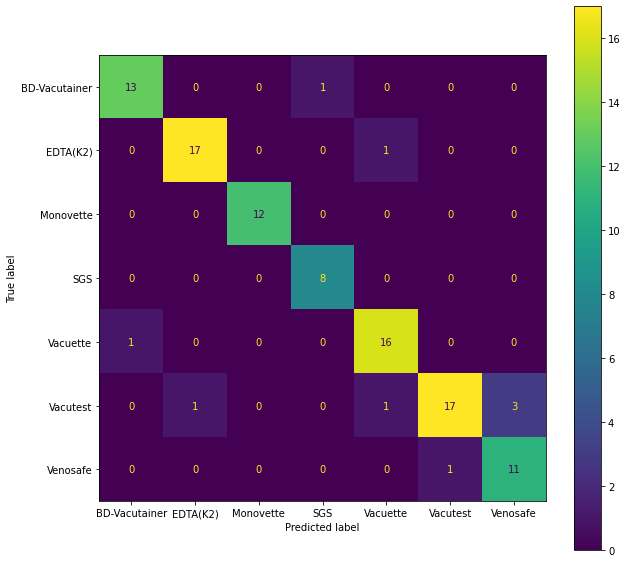

In [20]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_pred, test_generator.classes)
cmd = ConfusionMatrixDisplay(cm, display_labels=[ 'BD-Vacutainer', 'EDTA(K2)', 'Monovette','SGS', 'Vacuette' , 'Vacutest', 'Venosafe'])
fig, ax = plt.subplots(figsize=(10,10))
plt.grid(False)
cmd.plot(ax=ax)

In [21]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

print('Accuracy Score :', accuracy_score(y_pred, test_generator.classes)) 
print ('Report : ')
target_names = ['BD-Vacutainer', 'EDTA(K2)', 'Monovette', 'SGS', 'Vacuette' , 'Vacutest', 'Venosafe']
print (classification_report(y_pred, test_generator.classes, target_names=target_names)) 

Accuracy Score : 0.912621359223301
Report : 
               precision    recall  f1-score   support

BD-Vacutainer       0.93      0.93      0.93        14
     EDTA(K2)       0.94      0.94      0.94        18
    Monovette       1.00      1.00      1.00        12
          SGS       0.89      1.00      0.94         8
     Vacuette       0.89      0.94      0.91        17
     Vacutest       0.94      0.77      0.85        22
     Venosafe       0.79      0.92      0.85        12

     accuracy                           0.91       103
    macro avg       0.91      0.93      0.92       103
 weighted avg       0.92      0.91      0.91       103



The first accuracy score was 15.53%, this could be due to the image. One of the plausible issues i can think of that cause such a low accuracy is the fact that maybe tht augmented image has not been since by the model.

##### Update:
There was an issue where the accuracy was giving 15 percent accuracy, that has been now solved. The issue was when model.predict() the train folder it organized the result of the folder and doesn't work with the randomize order of test_generator.classes. To prevent this from happening add "shuffle= False" in the parameter of your imageDataGenerator.



#### Test an image


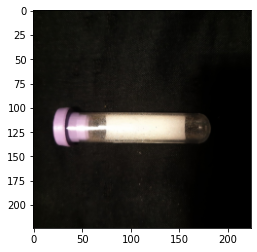

In [22]:
from skimage.transform import resize
Image = plt.imread("output_path/test/BD-Vacutainer/BD-Vacutainer1_small_constrast.jpg")
RImage = resize(Image, (img_width, img_height, 3))
img = plt.imshow(RImage)

In [23]:
predictions = model.predict(np.array( [RImage] ))
predictions

y_pred = np.argmax(predictions, axis=1)

print(y_pred)
# should give 0 as it is vacutainer

1/1 [==============================] - 0s 192ms/step
[0]
